# EEG Analysis - Experiment 1 using EEG 1.0 device

**Experiment Outline**: The EEG data has been measured for 21days. For 11 days, it was monitor for the usage of system consistency and for the next 1 week, pilocarpine was injected to monitor if there were sever difference during seizuring episodes. 

The EEG device we used was manufacture as following:

![EEG Device 1.0](./img/device1.0.png) ![Intan pin](./img/intan_pin.png)

## Pin Mapping Configuration

| Pin | Input | Pin | Input | Pin | Input | Pin | Input |
|-----|-------|-----|-------|-----|-------|-----|-------|
| **1**   | **in11**  | **5**   | **in23**  | **9**   | **in12**  | 13  | in16  |
| **2**   | **in10**  | **6**   | **in22**  | 10  | in13  | 14  | in17  |
| **3**   | **in9**   | **7**   | **in21**  | 11  | in14  | 15  | in18  |
| **4**   | **in8**   | 8   | in20  | 12  | in15  | 16  | in19  |

In [1]:
import os
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

from utils import read_intan as ri
from utils import signal_preprocessing as spp
from utils import plot_chuncked_data as pcd


Successfully imported RHD utilities


In [2]:
raw_path = './data/intan/attempt1/d0_1'
npz_path = './data/compressed/attempt1'
exp_name = raw_path.split('/')[-1]
pin_map = {
        1: 'in11', 2: 'in10', 3: 'in9', 4: 'in8',
        5: 'in23', 6: 'in22', 7: 'in21', 8: 'in20',
        9: 'in12', 10: 'in13', 11: 'in14', 12: 'in15',
        13: 'in16', 14: 'in17', 15: 'in18', 16: 'in19'
    }

In [3]:
# Check if compressed data exists, if not create it from raw data
npz_file = f"{npz_path}/{exp_name}.npz"
metadata_file = f"{npz_path}/{exp_name}_metadata.json"

# Checking if the data already exists
if os.path.exists(npz_file) and os.path.exists(metadata_file):
    print(f"Data and Metadata file exists: {npz_file} \n {metadata_file}")
    data, metadata = ri.load_experiment_numpy(npz_file, metadata_file)

else:
    print(f"Npz Data file does not exist, creating from raw data at {npz_path}")
    output_paths = ri.save_experiment_numpy(raw_path, 
                                            npz_path, 
                                            resample_rate=1000, 
                                            use_pin_names=True, 
                                            hk=False)
    # output_paths = ri.save_experiment_numpy(raw_path, 
    #                                         npz_path, 
    #                                         resample_rate=1000, 
    #                                         use_pin_names=True, 
    #                                         hk=True, 
    #                                         hk_params={'env_threshold':5,
    #                                                    'kurtosis_threshold':3 , 
    #                                                    'window_size': 2, 
    #                                                    'step_size': 1,
    #                                                    "interpolate":True})
    # Load the data that was just saved
    data, metadata = ri.load_experiment_numpy(output_paths['numpy_data'], output_paths['metadata'])

print(f"\n📊 Data Summary:")
print(f"   Type: {type(data).__name__}")
print(f"   Shape: {data.shape}")
print(f"   Columns: {list(data.columns)}")
if 'total_duration' in metadata and metadata['total_duration'] != 'unknown':
    print(f"   Duration: {metadata['total_duration']:.2f} seconds")

# Test individual channel conversion
print(f"\n🔌 Channel to Pin Mapping Test:")
sample_channels = ['B-008', 'B-009', 'B-010', 'B-021', 'B-022', 'B-023']
for channel in sample_channels:
    pin_name = ri.channel_name_to_pin(channel)
    print(f"   {channel} → {pin_name}")

Npz Data file does not exist, creating from raw data at ./data/compressed/attempt1
Step 1: Converting RHD files to DataFrame...
Found 5 RHD files in ./data/intan/attempt1/d0_1
Successfully loaded data from during surgery_250609_132716.rhd
Successfully loaded data from during surgery_250609_133216.rhd
Successfully loaded data from during surgery_250609_133716.rhd
Successfully loaded data from during surgery_250609_134216.rhd
Successfully loaded data from during surgery_250609_134716.rhd
Processing 5 files with 8 channels
Channels: ['B-008', 'B-009', 'B-010', 'B-011', 'B-012', 'B-021', 'B-022', 'B-023']
Concatenating data from all files...
Resampling from 20000 Hz to 1000 Hz...


100%|██████████| 9/9 [01:16<00:00,  8.52s/it]


Successfully created DataFrame with 1410963 samples and 8 channels
Total recording duration: 1410.96 seconds

Step 2: Converting to numpy and saving...
Converting DataFrame to numpy arrays...
Converting channel names to pin names...
Mapped B-008 -> pin_4
Mapped B-009 -> pin_3
Mapped B-010 -> pin_2
Mapped B-011 -> pin_1
Mapped B-012 -> pin_9
Mapped B-021 -> pin_7
Mapped B-022 -> pin_6
Mapped B-023 -> pin_5
  - time: shape (1410963,), dtype float64
  - pin_4: shape (1410963,), dtype float64
  - pin_3: shape (1410963,), dtype float64
  - pin_2: shape (1410963,), dtype float64
  - pin_1: shape (1410963,), dtype float64
  - pin_9: shape (1410963,), dtype float64
  - pin_7: shape (1410963,), dtype float64
  - pin_6: shape (1410963,), dtype float64
  - pin_5: shape (1410963,), dtype float64
✓ Saved as compressed numpy archive: ./data/compressed/attempt1\d0_1.npz
✓ Saved metadata: ./data/compressed/attempt1\d0_1_metadata.json

🎉 Successfully saved experiment data!
   - Numpy data: ./data/compr

In [4]:
# Data processing completed successfully
# The compressed data has been saved to: ./data/compressed/attempt1.npz
print(f"✓ Data processing complete!")
print(f"✓ Compressed file saved: {npz_path}.npz")
print(f"✓ Data shape: {data.shape}")

✓ Data processing complete!
✓ Compressed file saved: ./data/compressed/attempt1.npz
✓ Data shape: (1410963, 9)


In [5]:
# Test the channel to pin conversion
test_channels = ['B-008', 'B-009', 'B-010', 'B-011', 'B-012', 'B-021', 'B-022', 'B-023']

print("🔌 Channel to Pin Conversion Test:")
for channel in test_channels:
    pin_name = ri.channel_name_to_pin(channel)
    print(f"   {channel} → {pin_name}")

print(f"\n📊 Current Data Columns:")
print(f"   {list(data.columns)}")

print(f"\n📋 Data Preview (first 5 rows):")
print(data.head())

🔌 Channel to Pin Conversion Test:
   B-008 → pin_4
   B-009 → pin_3
   B-010 → pin_2
   B-011 → pin_1
   B-012 → pin_9
   B-021 → pin_7
   B-022 → pin_6
   B-023 → pin_5

📊 Current Data Columns:
   ['time', 'pin_4', 'pin_3', 'pin_2', 'pin_1', 'pin_9', 'pin_7', 'pin_6', 'pin_5']

📋 Data Preview (first 5 rows):
    time       pin_4       pin_3       pin_2       pin_1       pin_9  \
0  0.000 -135.649771 -544.739022 -113.938603 -142.900123 -251.554530   
1  0.001 -165.930383 -897.553829 -106.580484 -171.096239 -310.673760   
2  0.002 -136.053082 -742.594060  -92.703900 -142.830195 -269.747499   
3  0.003 -137.091326 -769.654021  -90.966346 -145.855757 -271.227895   
4  0.004 -139.395109 -724.940345  -93.374147 -147.148895 -264.675222   

        pin_7       pin_6       pin_5  
0 -152.131165 -164.975564 -126.698872  
1 -134.442733 -158.167173 -119.789188  
2 -125.030182 -142.972856 -104.573288  
3 -120.389562 -136.700407 -103.530393  
4 -124.184295 -141.716280 -106.958642  


In [6]:
# EEG Preprocessing with Automatic NPZ Saving
print("🧠 Starting EEG Preprocessing with Auto-Save...")
print("=" * 60)

# Preprocess the data and automatically save as NPZ with "_processed" suffix
print("📊 Original NPZ path:", npz_file)
print("📊 Expected processed path:", npz_file.replace('.npz', '_processed.npz'))

# Option 1: Using the main preprocessing function with save option
processed_data, saved_path = spp.preprocess_eeg_data(
    data, 
    bandpass_range=(1, 300), 
    remove_dc=True, 
    remove_artifacts=False, 
    save_npz=True,  # Enable NPZ saving
    original_npz_path=npz_file  # Original NPZ path
)

print(f"\n✅ Processed data saved to: {saved_path}")

# Option 2: Using preset function with save option
print("\n🎯 Alternative: Using preset function with save option")
# processed_data_preset, saved_path_preset = spp.preprocess_for_general_analysis(
#     data, 
#     artifact_method='hilbert_kurtosis',
#     save_npz=True,
#     original_npz_path=npz_file
# )

🧠 Starting EEG Preprocessing with Auto-Save...
📊 Original NPZ path: ./data/compressed/attempt1/d0_1.npz
📊 Expected processed path: ./data/compressed/attempt1/d0_1_processed.npz
🧠 Starting EEG preprocessing pipeline...
Estimated sampling rate: 1000.0 Hz
Removed DC offset from all channels
Applied bandpass filter: 1-300 Hz
✅ EEG preprocessing pipeline completed!
✅ Processed data saved to: data\compressed\attempt1\d0_1_processed.npz
   - Channels: 8
   - Samples: 1,410,963
   - Duration: 1410.96 seconds
   - Sampling rate: 1000.0 Hz

✅ Processed data saved to: data\compressed\attempt1\d0_1_processed.npz

🎯 Alternative: Using preset function with save option


In [17]:
# Loading Processed EEG Data from NPZ
print("📂 Loading Processed Data")
print("=" * 40)

# Example of how to load the processed data later
processed_npz_path = npz_file.replace('.npz', '_processed.npz')

if os.path.exists(processed_npz_path):
    print(f"📥 Loading processed data from: {processed_npz_path}")
    
    # Load processed data and metadata
    loaded_data, loaded_metadata = spp.load_processed_data_npz(processed_npz_path)
    
    print(f"\n📊 Loaded Data Summary:")
    print(f"   Shape: {loaded_data.shape}")
    print(f"   Columns: {list(loaded_data.columns)}")
    print(f"   Sampling Rate: {loaded_metadata['sampling_rate']} Hz")
    
    # Show preprocessing information
    if 'preprocessing_info' in loaded_metadata:
        preprocessing_info = loaded_metadata['preprocessing_info']
        print(f"\n🔧 Preprocessing Parameters Used:")
        for key, value in preprocessing_info.items():
            if value is not None and value != False:
                print(f"   {key}: {value}")
    
    # Compare original vs processed data
    print(f"\n⚖️  Data Comparison:")
    print(f"   Original shape: {data.shape}")
    print(f"   Processed shape: {loaded_data.shape}")
    print(f"   Same time range: {np.allclose(data['time'], loaded_data['time'])}")
    
else:
    print(f"❌ Processed file not found: {processed_npz_path}")
    print("   Run the preprocessing cell above first!")

📂 Loading Processed Data
📥 Loading processed data from: ./data/compressed/attempt1/d0_1_processed.npz
✅ Loaded processed data from: ./data/compressed/attempt1/d0_1_processed.npz
   - Channels: 8
   - Samples: 1,410,963
   - Sampling rate: 1000.0 Hz

📊 Loaded Data Summary:
   Shape: (1410963, 9)
   Columns: ['time', 'pin_4', 'pin_3', 'pin_2', 'pin_1', 'pin_9', 'pin_7', 'pin_6', 'pin_5']
   Sampling Rate: 999.9991849465281 Hz

🔧 Preprocessing Parameters Used:
   fs: 999.9991849465281
   bandpass_range: (1, 300)
   remove_dc: True
   artifact_methods: ['hilbert_kurtosis']
   artifact_threshold: 3
   env_threshold: 5
   kurtosis_threshold: 3
   window_size: 2.0
   step_size: 1.0
   interpolate: True

⚖️  Data Comparison:
   Original shape: (1410963, 9)
   Processed shape: (1410963, 9)
   Same time range: True


In [8]:
loaded_data.head()

,time,pin_4,pin_3,pin_2,pin_1,pin_9,pin_7,pin_6,pin_5
0,0.000,-22.421580,-90.074101,-18.830197,-23.620463,-41.593250,-25.146047,-27.270439,-20.940382
1,0.001,-99.308052,-437.187242,-77.977818,-104.005445,-184.709305,-102.831915,-113.566217,-86.926886
2,0.002,-171.973593,-845.907287,-123.472772,-179.123308,-323.468605,-160.925560,-182.304560,-138.230899
3,0.003,-154.938214,-867.701438,-99.792832,-161.516364,-300.819110,-130.184341,-151.735928,-112.736852
4,0.004,-112.116695,-657.246947,-71.273245,-119.111982,-225.610296,-95.981554,-110.491135,-81.573033


📈 Visualizing Original vs Processed Data
🔵 Original Data (3600-3603 seconds):


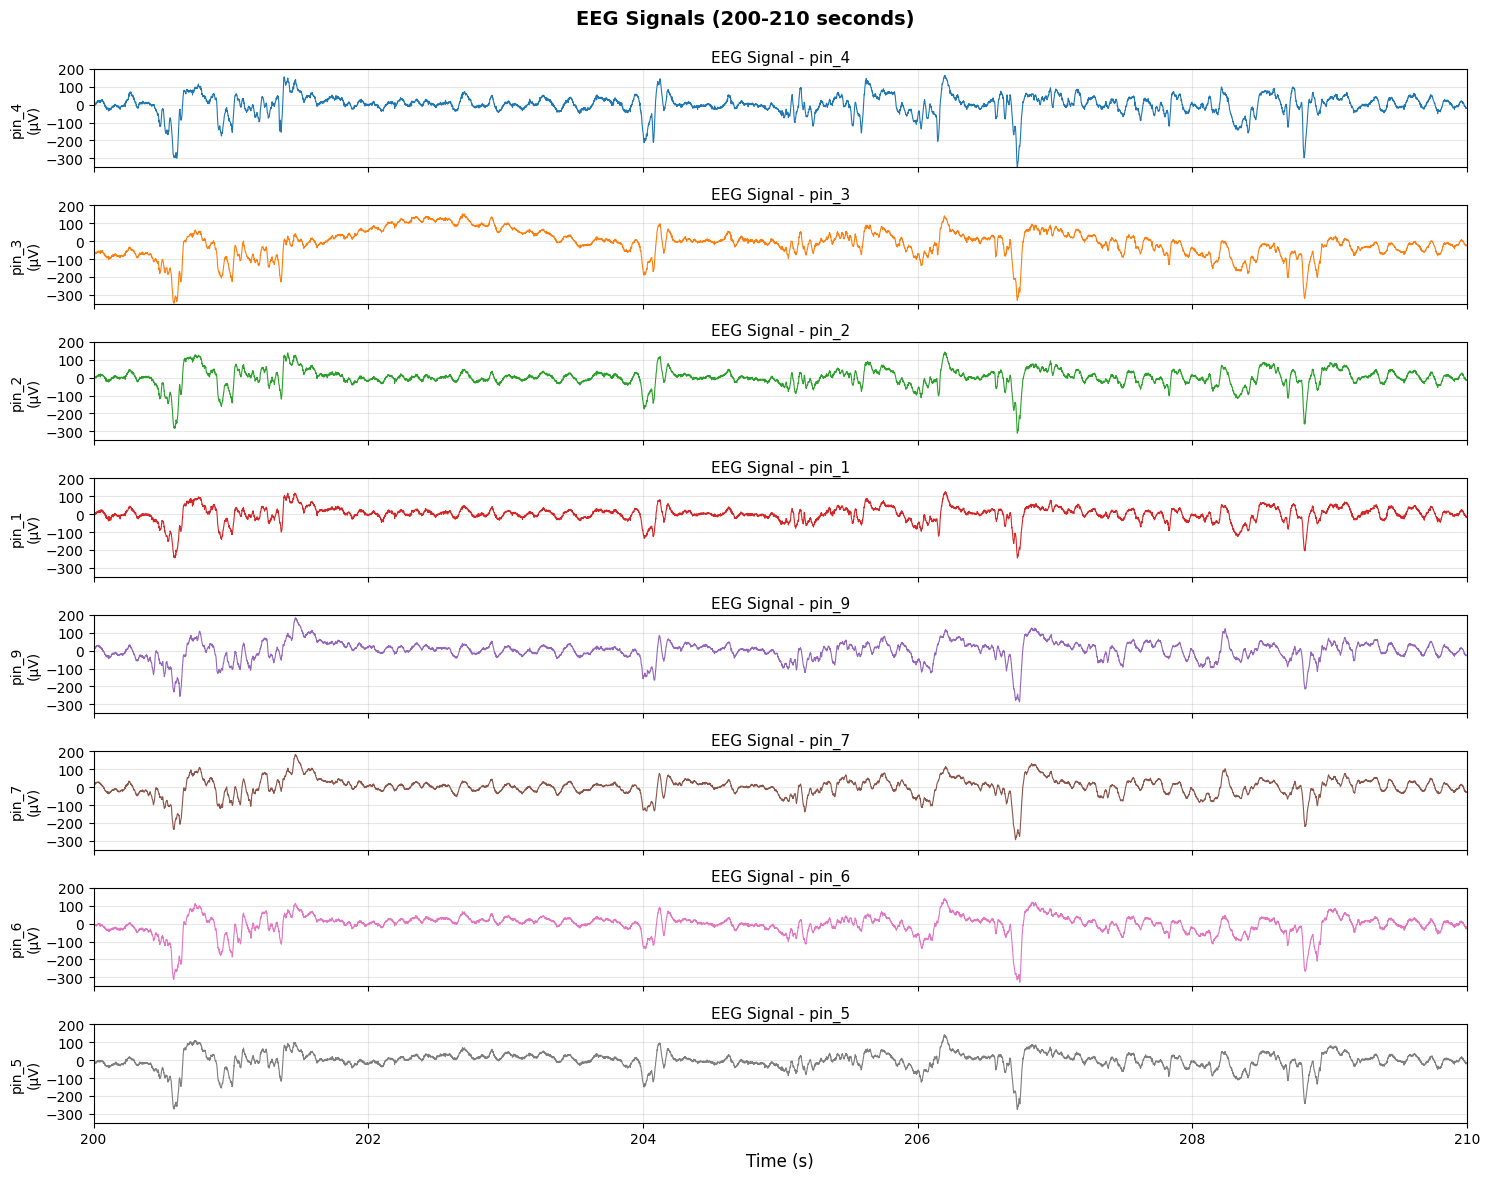

📊 Data Range Summary (200-210s):
   - Total samples: 10,000
   - Sampling rate: ~1000 Hz
   - Channels: ['pin_4', 'pin_3', 'pin_2', 'pin_1', 'pin_9', 'pin_7', 'pin_6', 'pin_5']

🟢 Processed Data (3600-3603 seconds):


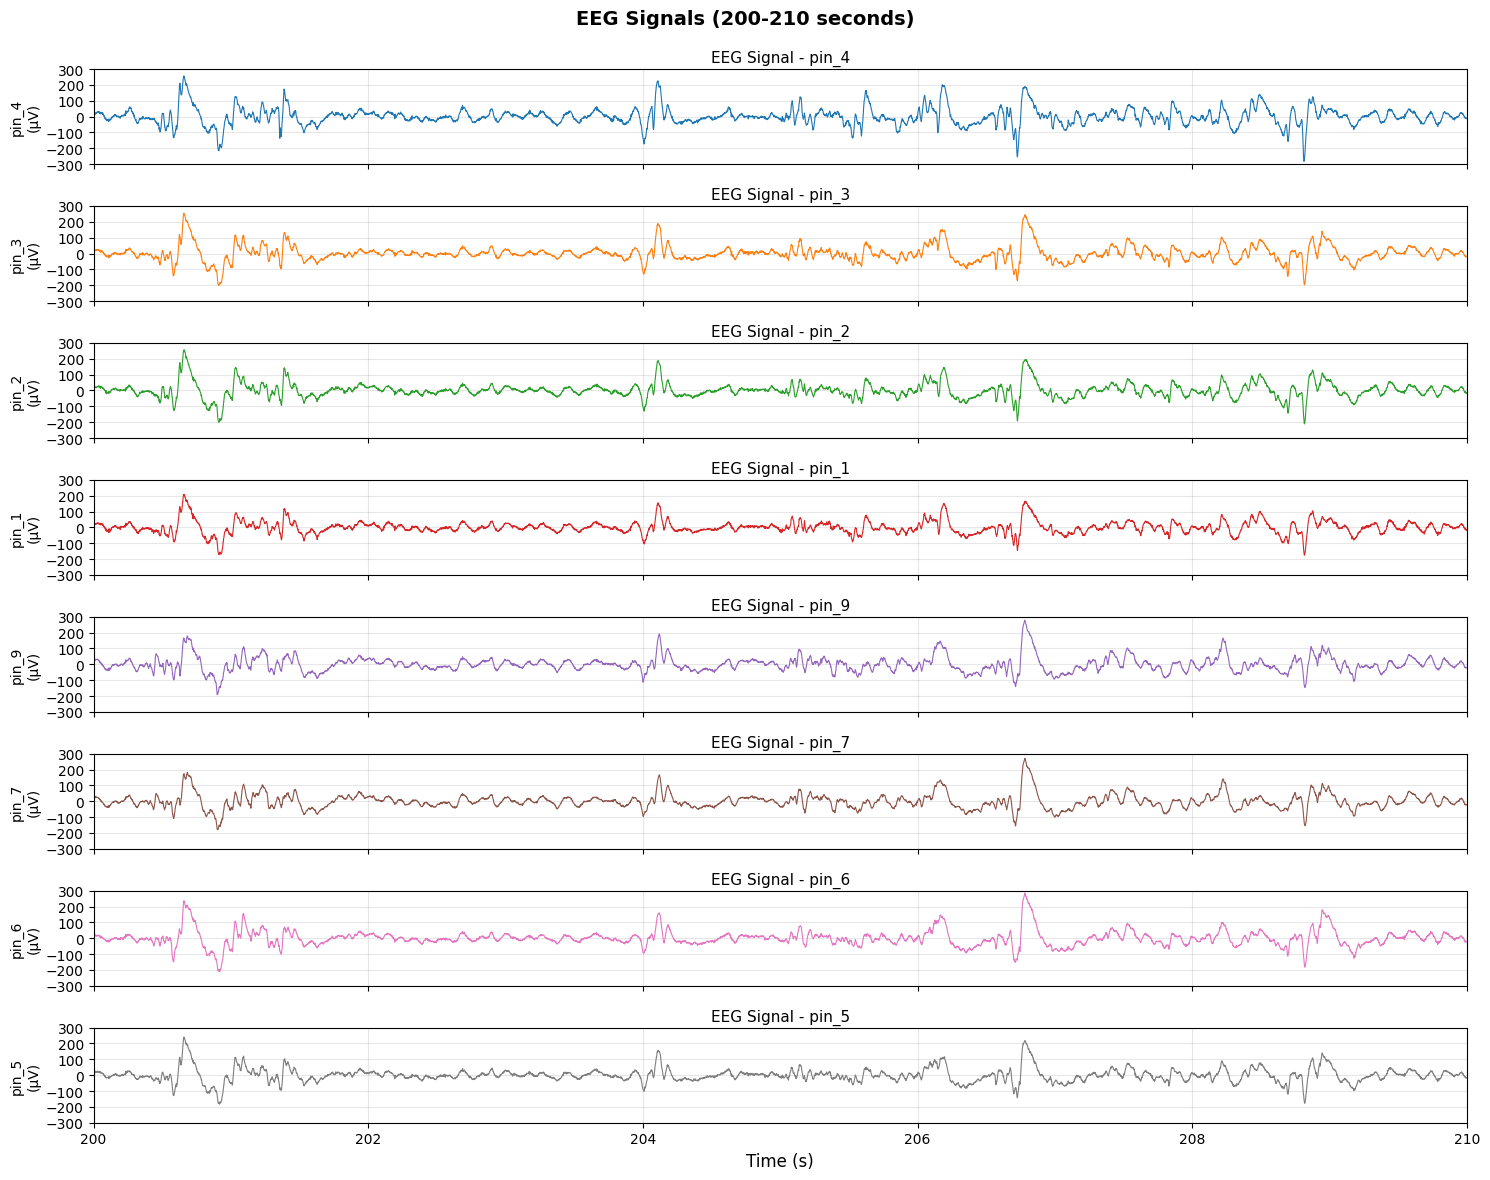

📊 Data Range Summary (200-210s):
   - Total samples: 10,000
   - Sampling rate: ~1000 Hz
   - Channels: ['pin_4', 'pin_3', 'pin_2', 'pin_1', 'pin_9', 'pin_7', 'pin_6', 'pin_5']

📊 Signal Quality Comparison:
   pin_4:
     Original STD: 141.53 µV
     Processed STD: 116.39 µV
     Noise reduction: 17.8%
   pin_3:
     Original STD: 170.01 µV
     Processed STD: 126.71 µV
     Noise reduction: 25.5%
   pin_2:
     Original STD: 153.69 µV
     Processed STD: 124.25 µV
     Noise reduction: 19.2%

🎯 Next Steps:
1. Use processed_data for further analysis
2. Load processed NPZ file for future sessions
3. Apply chunk plotting to processed data for detailed view


In [ ]:
# Visual Comparison: Original vs Processed Data
print("📈 Visualizing Original vs Processed Data")
print("=" * 50)

startime = 200  # Start time in seconds
duration = 10  # Duration in seconds
endtime = startime + duration  # End time in seconds

# Plot original data
print(f"🔵 Original Data ({startime}-{endtime} seconds):")
pcd.plot_eeg_data(data, start_time=startime, end_time=endtime)

# Plot processed data
if 'processed_data' in locals():
    print(f"\n🟢 Processed Data ({startime}-{endtime} seconds):")
    pcd.plot_eeg_data(loaded_data, start_time=startime, end_time=endtime)
    
    # Quick statistics comparison
    print("\n📊 Signal Quality Comparison:")
    original_channels = [col for col in data.columns if col != 'time']
    
    for channel in original_channels[:3]:  # Show first 3 channels
        if channel in processed_data.columns:
            orig_std = data[channel].std()
            proc_std = processed_data[channel].std()
            reduction = (1 - proc_std/orig_std) * 100
            
            print(f"   {channel}:")
            print(f"     Original STD: {orig_std:.2f} µV")
            print(f"     Processed STD: {proc_std:.2f} µV")
            print(f"     Noise reduction: {reduction:.1f}%")
else:
    print("❌ Processed data not available. Run preprocessing cell first!")

print("\n🎯 Next Steps:")
print("1. Use processed_data for further analysis")
print("2. Load processed NPZ file for future sessions")
print("3. Apply chunk plotting to processed data for detailed view")

🎯 Quick plotting options:
1. plot_first_30s(data)    # First 30 seconds
2. plot_middle_section(data)  # Middle 30 seconds
3. plot_last_30s(data)     # Last 30 seconds
4. interactive_eeg_plot(data)  # Custom time range

📈 Showing first 30 seconds of data:


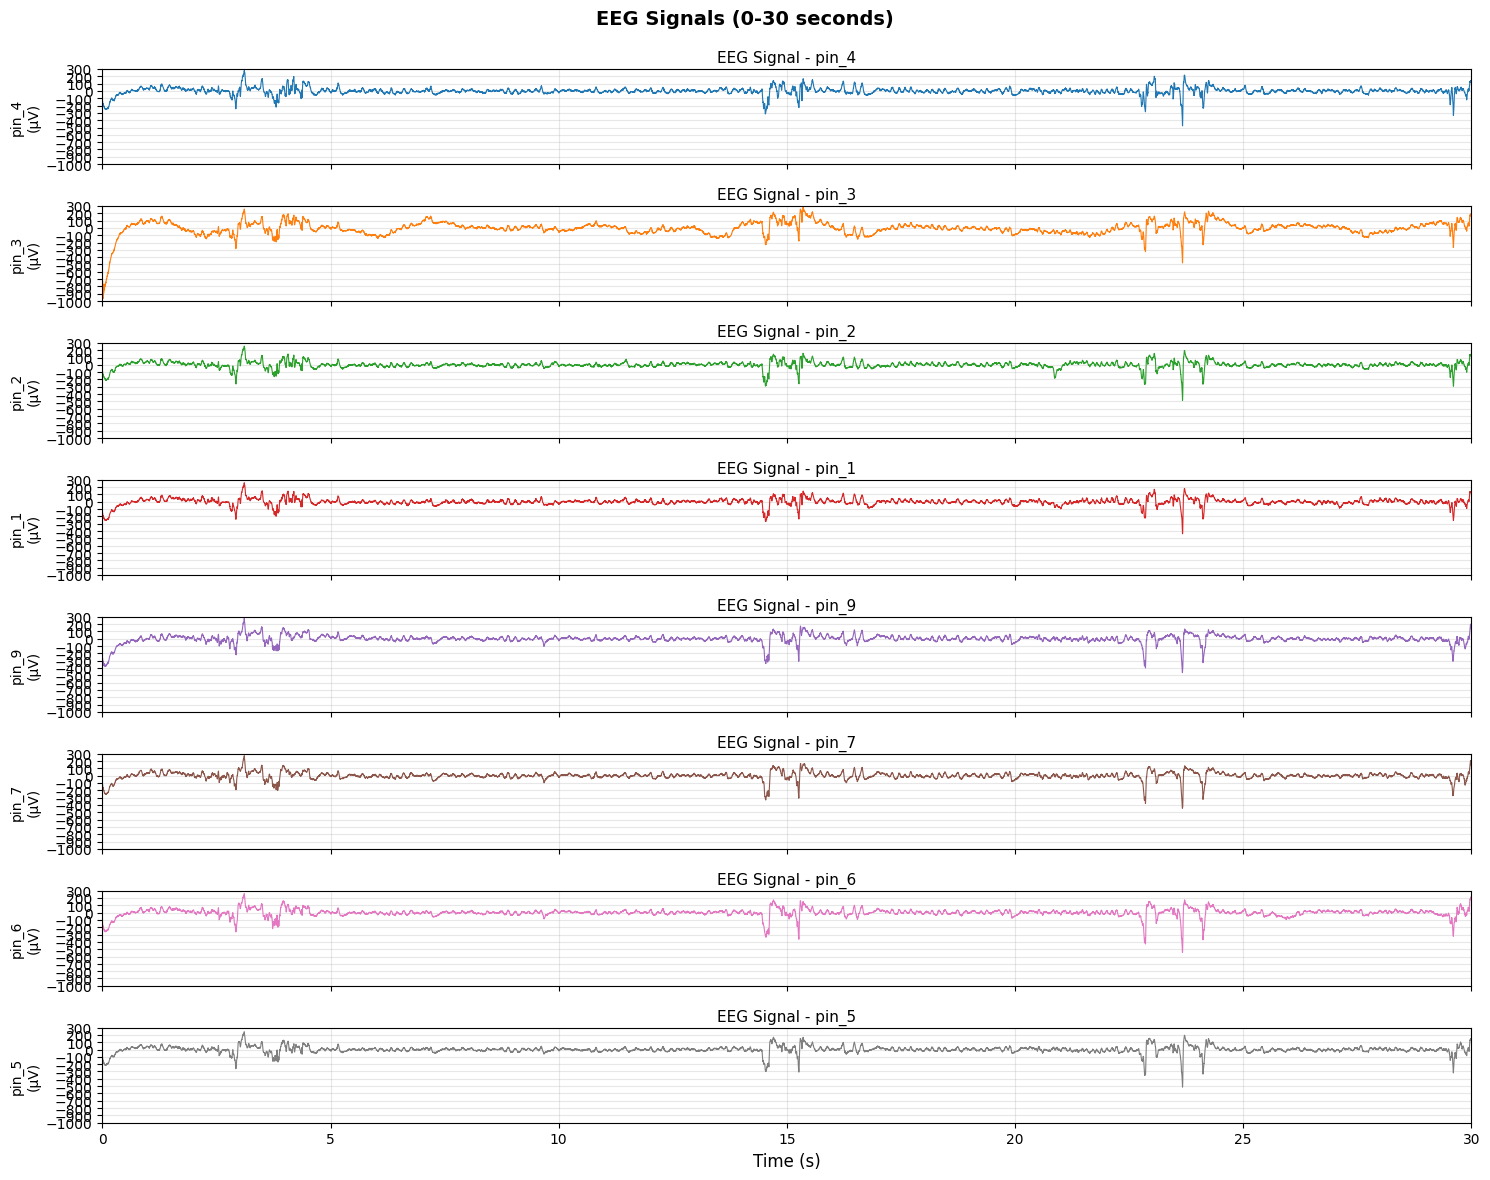

📊 Data Range Summary (0-30s):
   - Total samples: 30,000
   - Sampling rate: ~1000 Hz
   - Channels: ['pin_4', 'pin_3', 'pin_2', 'pin_1', 'pin_9', 'pin_7', 'pin_6', 'pin_5']
🎯 EEG Chunk Plotter Created!
\nUsage Examples:
1. Raw signals:
   eeg_plotter.plot_chunks_raw(start_time=10, end_time=50, chunk_duration=5)
\n2. Differential signals:
   groups = {'group1': [(4,1), (1,5), (5,6)], 'group2': [(4,2), (2,3)]}
   eeg_plotter.plot_chunks_differential(start_time=10, end_time=50, chunk_duration=5, groups=groups)
\n3. Quick test:
\n📈 Demo: Raw signals (first 30s, 5s chunks)
Created 3 chunks of 10s each
Time range: 500s - 530s


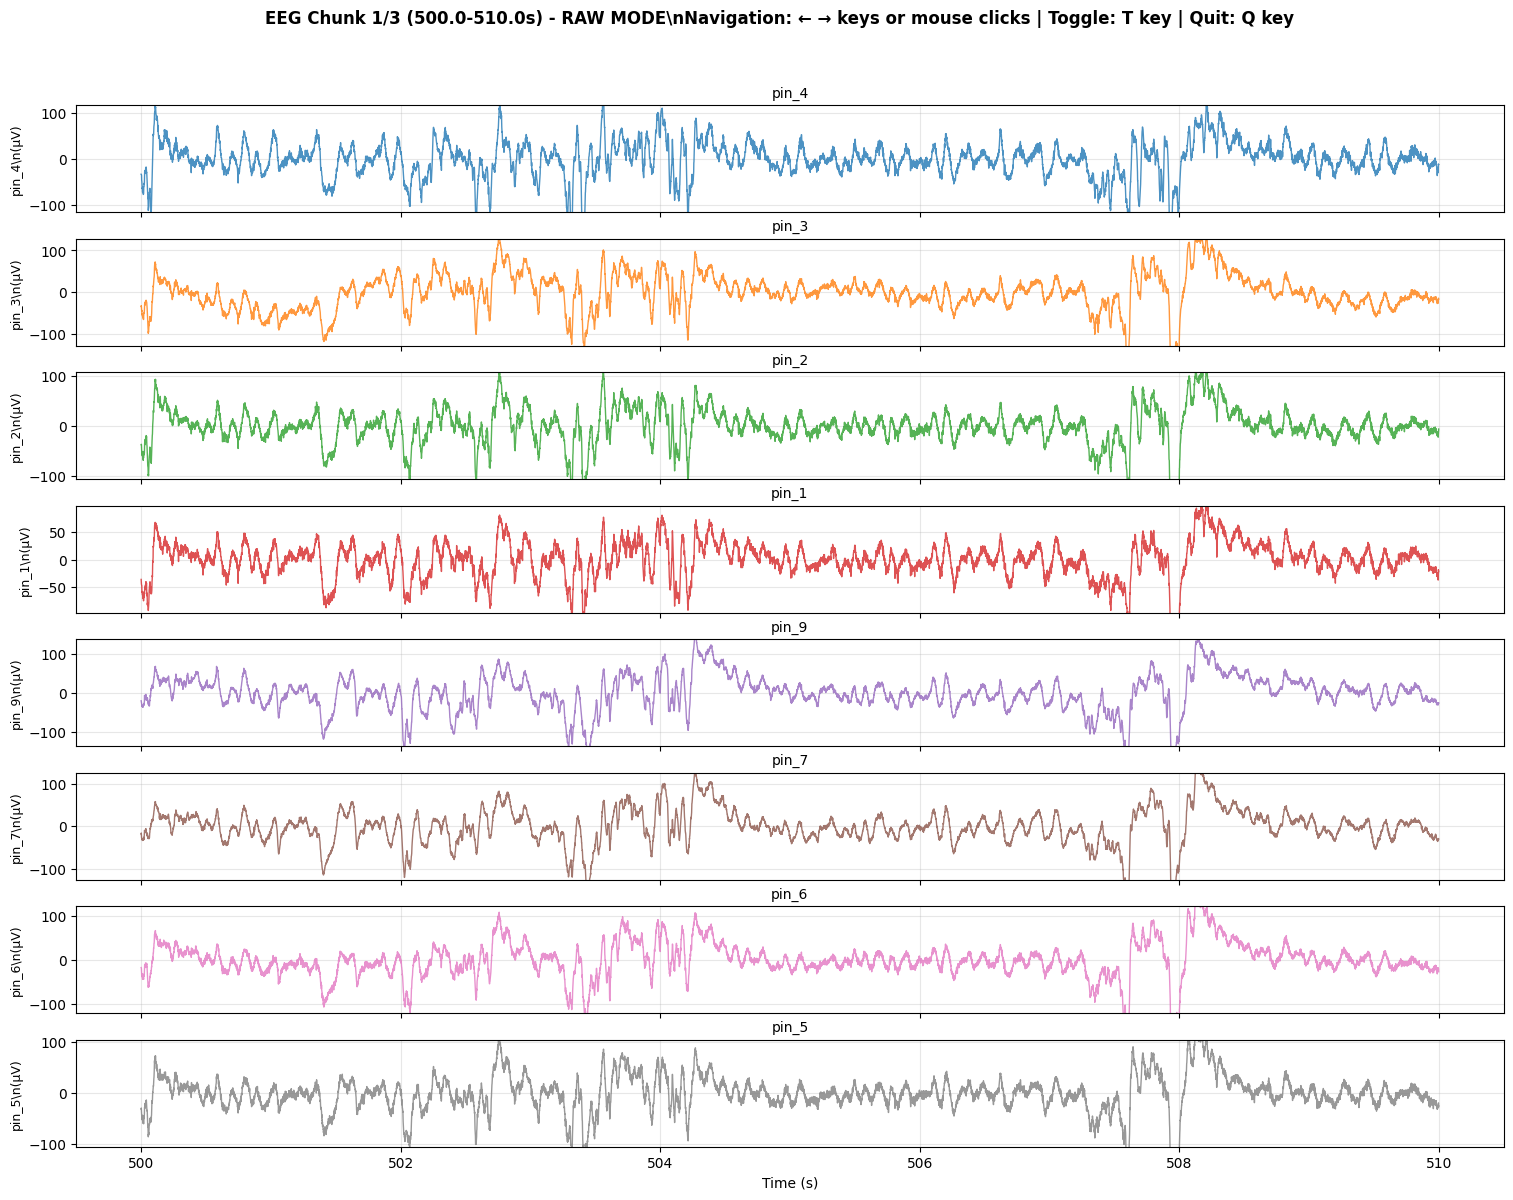

In [21]:
startime = 500  # Start time in seconds
duration = 30  # Duration in seconds
endtime = startime + duration  # End time in seconds

print("🎯 Quick plotting options:")
print("1. plot_first_30s(data)    # First 30 seconds")
print("2. plot_middle_section(data)  # Middle 30 seconds") 
print("3. plot_last_30s(data)     # Last 30 seconds")
print("4. interactive_eeg_plot(data)  # Custom time range")

# 첫 30초 자동 시각화
print("\n📈 Showing first 30 seconds of data:")
pcd.plot_first_30s(data)
eeg_plotter = pcd.EEGChunkPlotter(data)

# Usage examples
print("🎯 EEG Chunk Plotter Created!")
print("\\nUsage Examples:")
print("1. Raw signals:")
print("   eeg_plotter.plot_chunks_raw(start_time=10, end_time=50, chunk_duration=5)")
print("\\n2. Differential signals:")
print("   groups = {'group1': [(4,1), (1,5), (5,6)], 'group2': [(4,2), (2,3)]}")
print("   eeg_plotter.plot_chunks_differential(start_time=10, end_time=50, chunk_duration=5, groups=groups)")
print("\\n3. Quick test:")

# Quick demo with first 30 seconds, 5-second chunks
print("\\n📈 Demo: Raw signals (first 30s, 5s chunks)")
eeg_plotter.plot_chunks_raw(start_time=startime, end_time=endtime, chunk_duration=10)

In [11]:
# Enhanced EEG Chunk Plotter with Advanced Features
import matplotlib.patches as patches
from scipy import signal
from scipy.stats import zscore
import numpy as np

# Create enhanced plotter instance  
enhanced_plotter = pcd.EnhancedEEGChunkPlotter(data, sampling_rate=1000)

print("🚀 Enhanced EEG Chunk Plotter Created!")
print("\\n✨ New Features:")
print("- 🎨 Enhanced visual styling with color palette")
print("- 📊 Spectrogram view (press 'G')")
print("- 📈 Statistical analysis view (press 'S')")
print("- ⌨️  Advanced keyboard navigation")
print("- 🔄 Multiple view modes with easy switching")
print("- 📋 Real-time statistics display")
print("- 🎯 Improved chunk overlap support")
print("\\n🎮 Usage:")
print("enhanced_plotter.plot_chunks_interactive(start_time=0, end_time=60, chunk_duration=10, overlap=0.1)")
print("\\n⌨️  Press 'H' during plotting to see all keyboard shortcuts!")

🚀 Enhanced EEG Chunk Plotter Created!
\n✨ New Features:
- 🎨 Enhanced visual styling with color palette
- 📊 Spectrogram view (press 'G')
- 📈 Statistical analysis view (press 'S')
- ⌨️  Advanced keyboard navigation
- 🔄 Multiple view modes with easy switching
- 📋 Real-time statistics display
- 🎯 Improved chunk overlap support
\n🎮 Usage:
enhanced_plotter.plot_chunks_interactive(start_time=0, end_time=60, chunk_duration=10, overlap=0.1)
\n⌨️  Press 'H' during plotting to see all keyboard shortcuts!


📊 Example 1: Enhanced Raw Signal Visualization
Created 6 chunks of 10s each
Overlap: 10.0%
Time range: 0s - 55.0s

        🎯 Enhanced EEG Chunk Plotter - Keyboard Shortcuts:
        
        Navigation:
        ← / →     : Previous/Next chunk
        ↑ / ↓     : Cycle through view modes
        
        View Modes:
        R         : Raw signals view
        D         : Differential signals view (if groups defined)
        G         : Spectrogram view
        S         : Statistics view
        
        Other:
        H         : Show this help
        Q         : Quit
        
        Mouse:
        Left click  : Next chunk
        Right click : Previous chunk
        


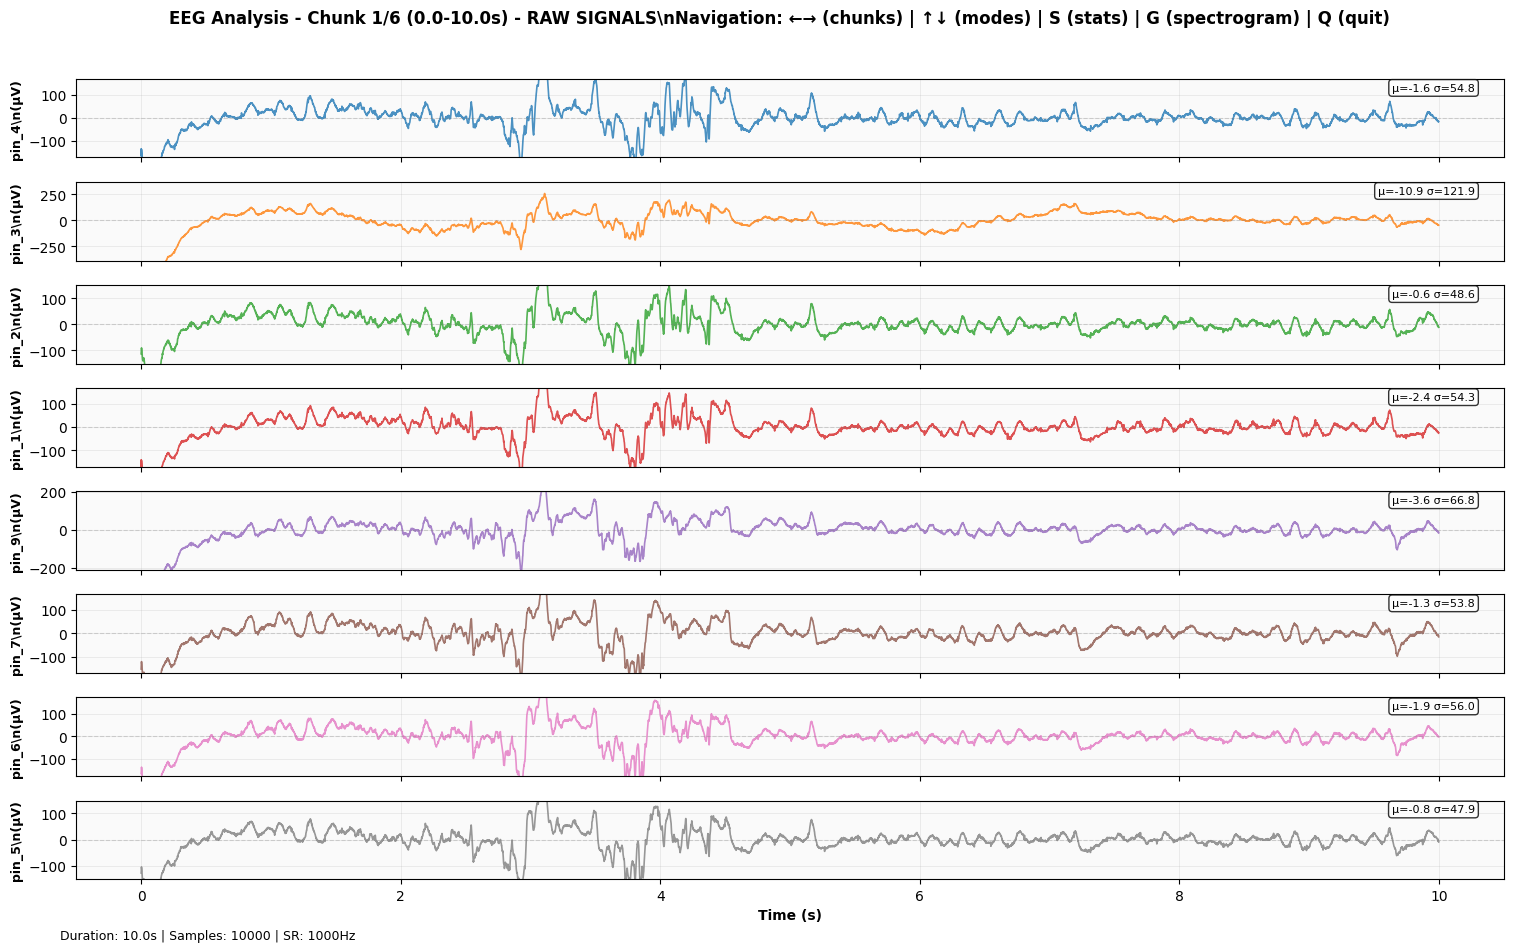

In [12]:
# 🎯 Enhanced EEG Chunk Plotter - Usage Examples and Demos

# Example 1: Basic raw signal visualization with enhanced features
print("📊 Example 1: Enhanced Raw Signal Visualization")
print("=" * 50)

# Start with a 60-second window, 10-second chunks with 10% overlap
enhanced_plotter.plot_chunks_interactive(
    start_time=0, 
    end_time=60, 
    chunk_duration=10, 
    overlap=0.1,
    mode='raw'
)

\n🔄 Example 2: Differential Signal Analysis
Set 3 differential groups:
  Anterior: [(4, 1), (1, 5), (5, 6)]
  Posterior: [(4, 2), (2, 3), (3, 6)]
  Cross: [(1, 2), (5, 3)]
\n📋 Differential Groups Configured:
  Anterior: [(4, 1), (1, 5), (5, 6)]
  Posterior: [(4, 2), (2, 3), (3, 6)]
  Cross: [(1, 2), (5, 3)]
\n🎮 Controls during visualization:
- Press 'D' to switch to differential mode
- Press 'R' to return to raw signals
- Use ↑↓ arrows to cycle between modes
- Press 'H' for full help
Created 6 chunks of 8s each
Overlap: 20.0%
Time range: 10s - 50.0s

        🎯 Enhanced EEG Chunk Plotter - Keyboard Shortcuts:
        
        Navigation:
        ← / →     : Previous/Next chunk
        ↑ / ↓     : Cycle through view modes
        
        View Modes:
        R         : Raw signals view
        D         : Differential signals view (if groups defined)
        G         : Spectrogram view
        S         : Statistics view
        
        Other:
        H         : Show this help
      

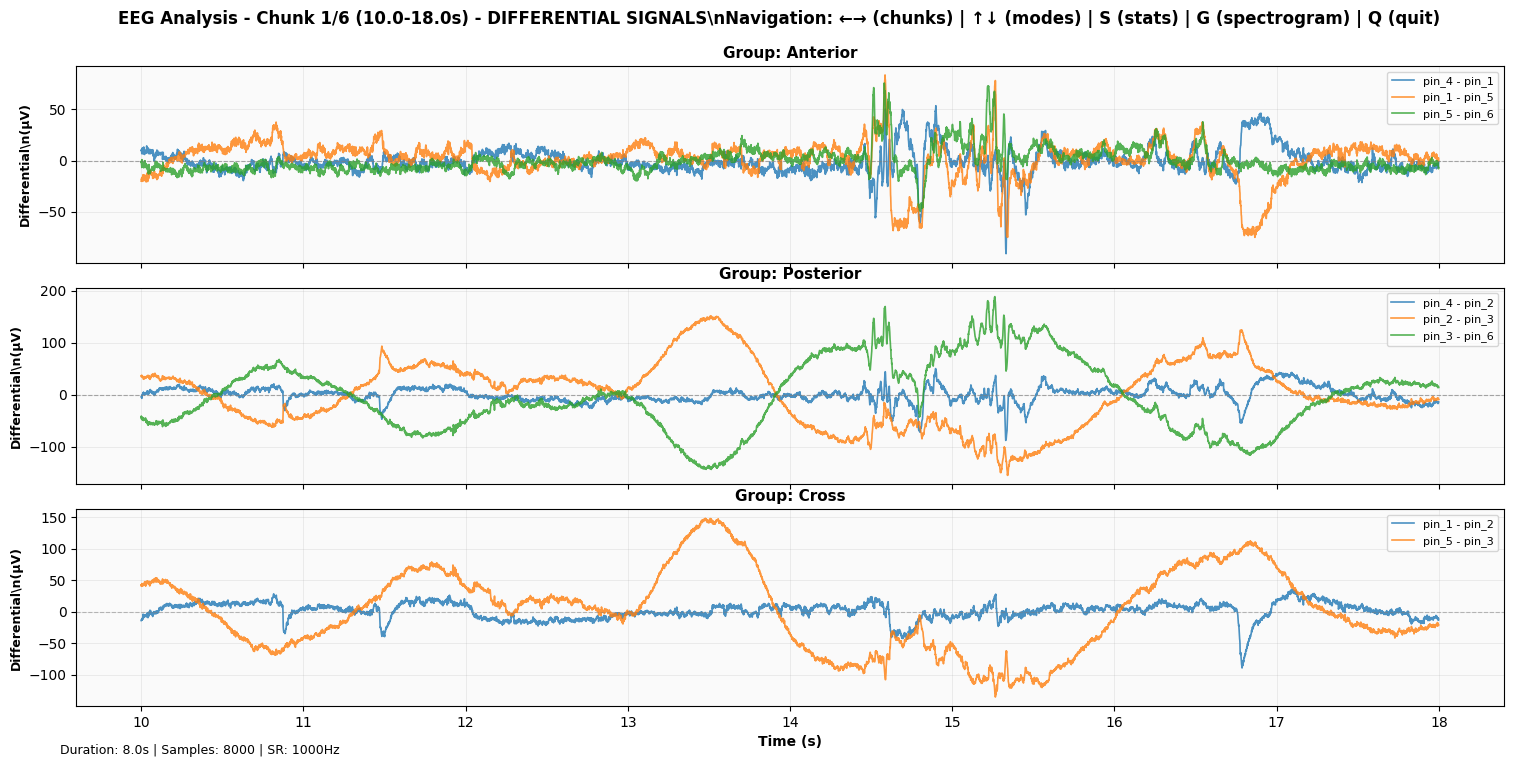

In [13]:
# Example 2: Differential Signal Analysis
print("\\n🔄 Example 2: Differential Signal Analysis")
print("=" * 50)

# Define differential groups for bipolar montage
differential_groups = {
    'Anterior': [(4, 1), (1, 5), (5, 6)],  # Front-to-back chain
    'Posterior': [(4, 2), (2, 3), (3, 6)], # Alternative pathway
    'Cross': [(1, 2), (5, 3)]              # Cross connections
}

# Set differential groups for the enhanced plotter
enhanced_plotter.set_differential_groups(differential_groups)

print("\\n📋 Differential Groups Configured:")
for group_name, pairs in differential_groups.items():
    print(f"  {group_name}: {pairs}")

print("\\n🎮 Controls during visualization:")
print("- Press 'D' to switch to differential mode")
print("- Press 'R' to return to raw signals")
print("- Use ↑↓ arrows to cycle between modes")
print("- Press 'H' for full help")

# Start interactive plotting with differential capability
enhanced_plotter.plot_chunks_interactive(
    start_time=10, 
    end_time=50, 
    chunk_duration=8, 
    overlap=0.2,
    mode='differential'
)

\n🌊 Example 3: Spectrogram Analysis
📊 Frequency domain analysis features:
- Time-frequency representation of EEG signals
- Power spectral density visualization
- Frequency range: 0-50 Hz (optimized for EEG)
- Color-coded power levels in dB
\n🎮 Spectrogram Mode Controls:
- Press 'G' to switch to spectrogram mode
- Press 'R' to return to time domain view
- Use ←→ to navigate between chunks
- Each subplot shows a different channel's spectrogram
Created 4 chunks of 15s each
Time range: 20s - 80.0s

        🎯 Enhanced EEG Chunk Plotter - Keyboard Shortcuts:
        
        Navigation:
        ← / →     : Previous/Next chunk
        ↑ / ↓     : Cycle through view modes
        
        View Modes:
        R         : Raw signals view
        D         : Differential signals view (if groups defined)
        G         : Spectrogram view
        S         : Statistics view
        
        Other:
        H         : Show this help
        Q         : Quit
        
        Mouse:
        Left c

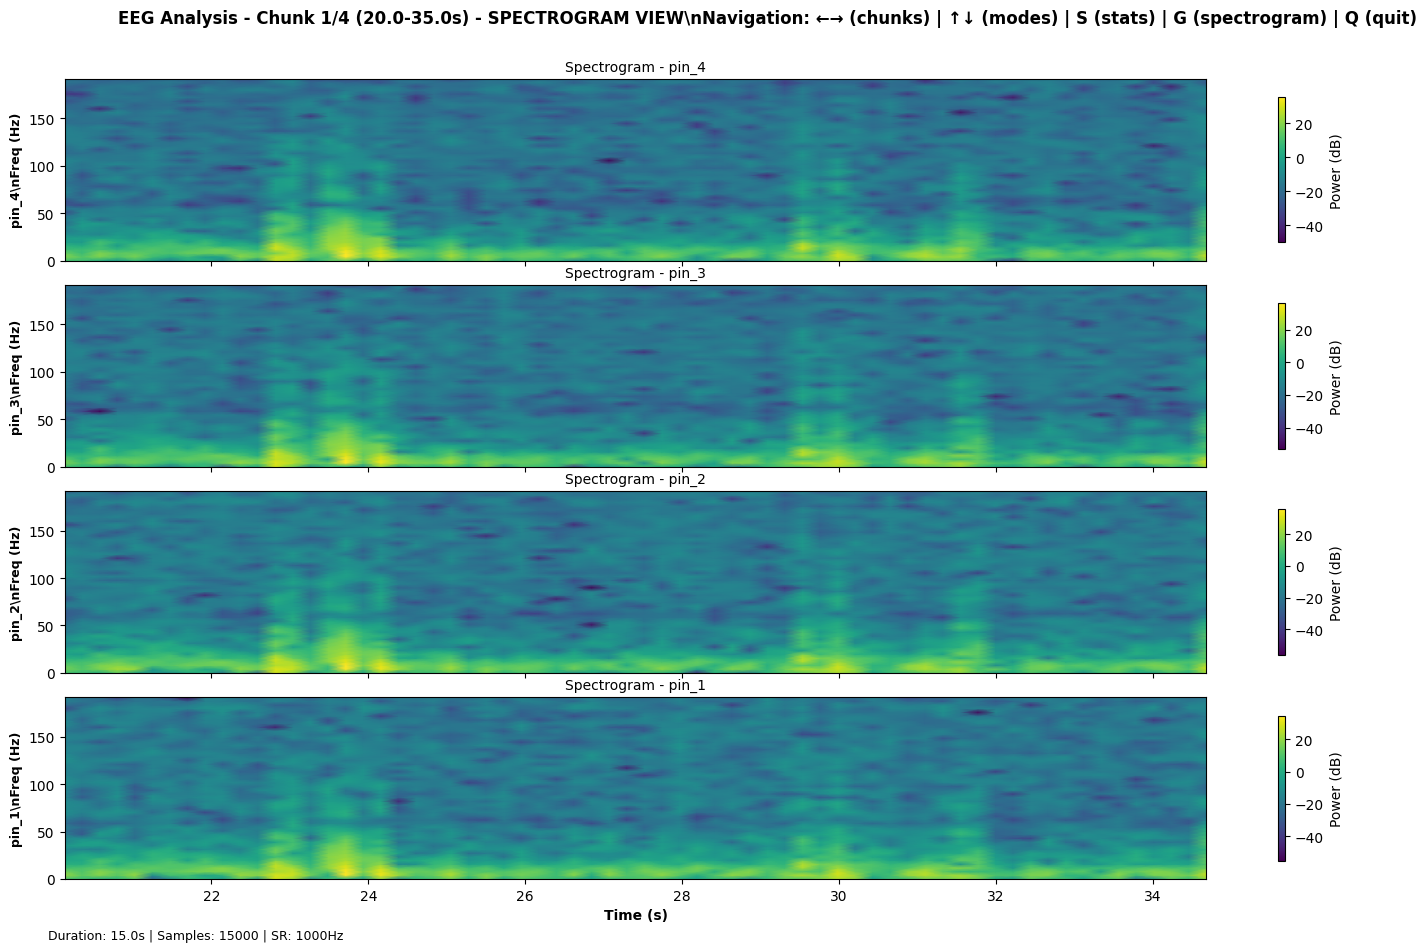

In [14]:
# Example 3: Spectrogram Analysis for Frequency Domain Investigation
print("\\n🌊 Example 3: Spectrogram Analysis")
print("=" * 50)

print("📊 Frequency domain analysis features:")
print("- Time-frequency representation of EEG signals")
print("- Power spectral density visualization")
print("- Frequency range: 0-50 Hz (optimized for EEG)")
print("- Color-coded power levels in dB")

print("\\n🎮 Spectrogram Mode Controls:")
print("- Press 'G' to switch to spectrogram mode")
print("- Press 'R' to return to time domain view")
print("- Use ←→ to navigate between chunks")
print("- Each subplot shows a different channel's spectrogram")

# Demonstrate spectrogram mode
enhanced_plotter.plot_chunks_interactive(
    start_time=20, 
    end_time=80, 
    chunk_duration=15, 
    overlap=0.0,
    mode='spectrogram'
)

\n📈 Example 4: Statistical Analysis
📊 Statistical metrics calculated per chunk:
- Mean amplitude (µV)
- Standard deviation (signal variability)
- RMS (Root Mean Square - signal power)
- Peak-to-peak amplitude (signal range)
\n💡 Use cases for statistical mode:
- Quick quality assessment of EEG channels
- Identification of noisy or artifact-laden channels
- Comparison of signal characteristics across time
- Detection of signal amplitude changes
\n🎮 Statistical Mode Controls:
- Press 'S' to switch to statistical mode
- Each subplot shows a different metric
- Bars are color-coded by channel
- Values are displayed on top of each bar
Created 6 chunks of 20s each
Overlap: 10.0%
Time range: 0s - 110.0s

        🎯 Enhanced EEG Chunk Plotter - Keyboard Shortcuts:
        
        Navigation:
        ← / →     : Previous/Next chunk
        ↑ / ↓     : Cycle through view modes
        
        View Modes:
        R         : Raw signals view
        D         : Differential signals view (if groups

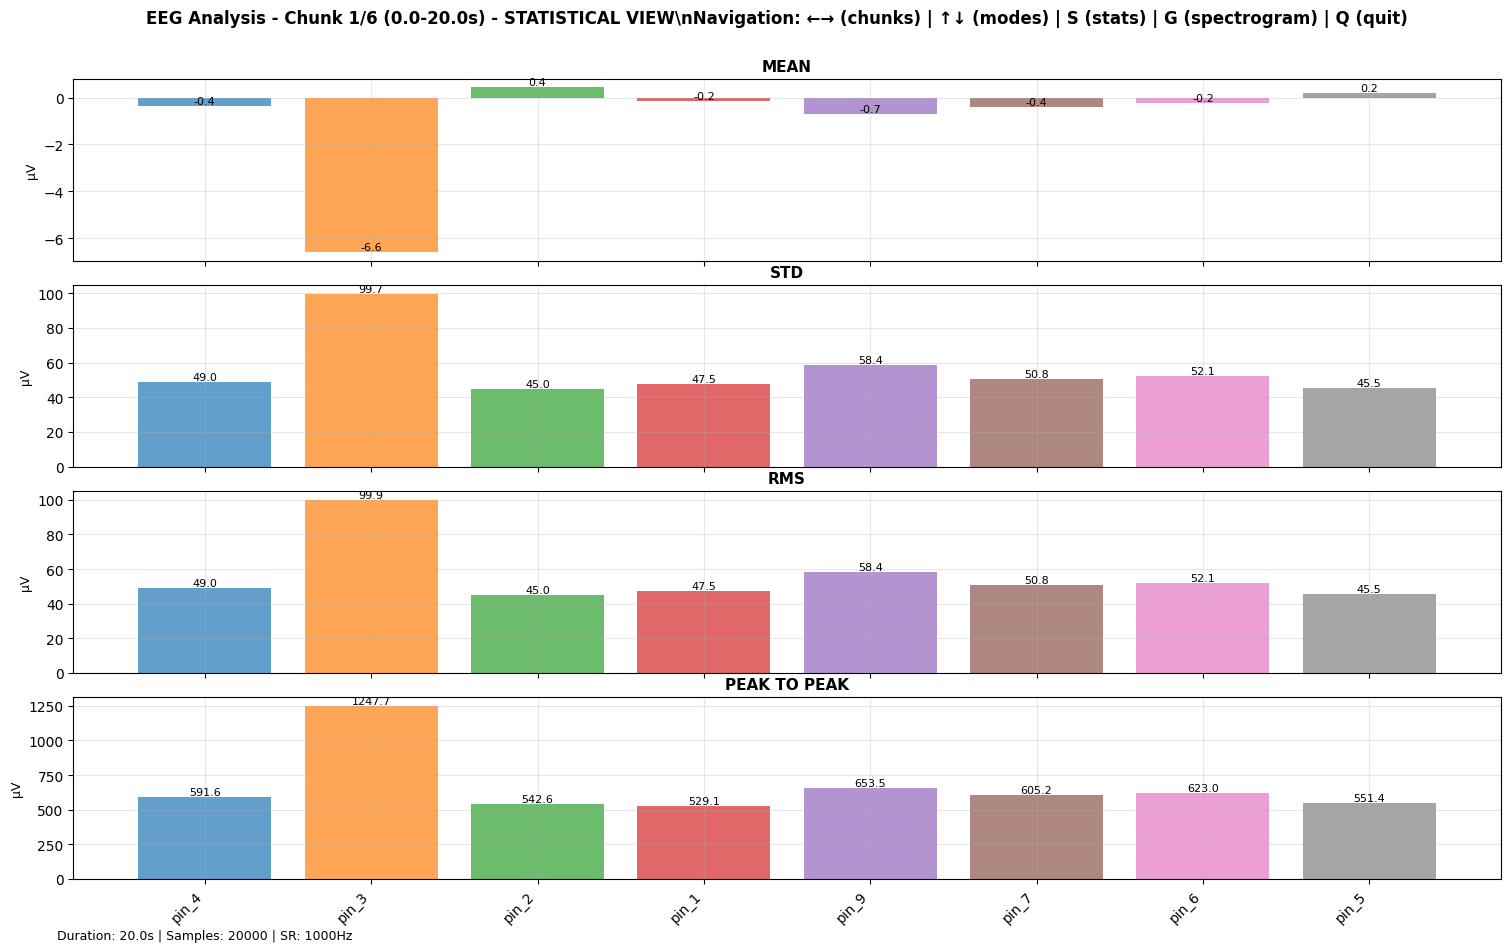

In [15]:
# Example 4: Statistical Analysis Mode
print("\\n📈 Example 4: Statistical Analysis")
print("=" * 50)

print("📊 Statistical metrics calculated per chunk:")
print("- Mean amplitude (µV)")
print("- Standard deviation (signal variability)")  
print("- RMS (Root Mean Square - signal power)")
print("- Peak-to-peak amplitude (signal range)")

print("\\n💡 Use cases for statistical mode:")
print("- Quick quality assessment of EEG channels")
print("- Identification of noisy or artifact-laden channels")
print("- Comparison of signal characteristics across time")
print("- Detection of signal amplitude changes")

print("\\n🎮 Statistical Mode Controls:")
print("- Press 'S' to switch to statistical mode")
print("- Each subplot shows a different metric")
print("- Bars are color-coded by channel")
print("- Values are displayed on top of each bar")

# Demonstrate statistical analysis mode
enhanced_plotter.plot_chunks_interactive(
    start_time=0, 
    end_time=120, 
    chunk_duration=20, 
    overlap=0.1,
    mode='statistics'
)

In [16]:
# 🎯 Enhanced EEG Chunk Plotter - Complete Feature Summary
print("=" * 70)
print("🚀 ENHANCED EEG CHUNK PLOTTER - COMPLETE FEATURES")
print("=" * 70)

print("\\n📋 CORE FEATURES:")
print("✅ Interactive chunk-based navigation")
print("✅ Multiple visualization modes")
print("✅ Enhanced visual styling with color palettes")
print("✅ Real-time statistics display")
print("✅ Configurable chunk overlap")
print("✅ Keyboard and mouse navigation")

print("\\n🎨 VISUALIZATION MODES:")
print("1️⃣  RAW SIGNALS")
print("   • Individual channel time series")
print("   • Enhanced styling with zero lines")
print("   • Real-time statistics overlay")
print("   • Optimized y-axis scaling")

print("\\n2️⃣  DIFFERENTIAL SIGNALS (Bipolar)")
print("   • Configurable electrode pair groups")
print("   • Multiple differential montages")
print("   • Group-based visualization")
print("   • Ideal for seizure detection")

print("\\n3️⃣  SPECTROGRAM ANALYSIS")
print("   • Time-frequency domain representation")
print("   • Power spectral density (0-50 Hz)")
print("   • Color-coded power levels")
print("   • Multiple channels simultaneously")

print("\\n4️⃣  STATISTICAL ANALYSIS")
print("   • Real-time statistical metrics")
print("   • Quality assessment tools")
print("   • Channel comparison")
print("   • Artifact detection support")

print("\\n⌨️  KEYBOARD SHORTCUTS REFERENCE:")
print("┌─────────────────────────────────────────────────────┐")
print("│ NAVIGATION                                          │")
print("│ ←/→ or P/N    : Previous/Next chunk                 │")
print("│ ↑/↓           : Cycle through view modes            │")
print("│                                                     │")
print("│ VIEW MODES                                          │")
print("│ R             : Raw signals view                    │")
print("│ D             : Differential signals view           │")
print("│ G             : Spectrogram view                    │")
print("│ S             : Statistics view                     │")
print("│                                                     │")
print("│ OTHER                                               │")
print("│ H             : Show help                           │")
print("│ Q             : Quit                                │")
print("│                                                     │")
print("│ MOUSE                                               │")
print("│ Left click    : Next chunk                          │")
print("│ Right click   : Previous chunk                      │")
print("└─────────────────────────────────────────────────────┘")

print("\\n💡 ANALYSIS WORKFLOW RECOMMENDATIONS:")
print("1. Start with RAW mode to assess overall data quality")
print("2. Use STATISTICS mode to identify problematic channels")
print("3. Switch to DIFFERENTIAL mode for bipolar analysis")
print("4. Use SPECTROGRAM mode for frequency domain investigation")
print("5. Navigate with overlap for continuous analysis")

print("\\n🔧 ADVANCED CONFIGURATION:")
print("• Adjustable chunk duration and overlap")
print("• Customizable differential electrode groups")
print("• Configurable sampling rate")
print("• Enhanced color palette system")

print("\\n✨ Ready for advanced EEG analysis!")
print("🎮 Use: enhanced_plotter.plot_chunks_interactive(...)")
print("📋 Press 'H' during plotting for context-sensitive help")

# Display current data info
print(f"\\n📊 CURRENT DATASET INFO:")
print(f"📁 Total duration: {data['time'].max():.1f} seconds")
print(f"📊 Sampling points: {len(data):,}")
print(f"🎛️  Channels available: {len([col for col in data.columns if col != 'time'])}")
print(f"📋 Channel names: {[col for col in data.columns if col != 'time']}")

# Quick start example
print("\\n🚀 QUICK START EXAMPLE:")
print("enhanced_plotter.plot_chunks_interactive(start_time=0, end_time=60, chunk_duration=10)")
print("\\nThen press different keys to explore all modes! 🎯")

🚀 ENHANCED EEG CHUNK PLOTTER - COMPLETE FEATURES
\n📋 CORE FEATURES:
✅ Interactive chunk-based navigation
✅ Multiple visualization modes
✅ Enhanced visual styling with color palettes
✅ Real-time statistics display
✅ Configurable chunk overlap
✅ Keyboard and mouse navigation
\n🎨 VISUALIZATION MODES:
1️⃣  RAW SIGNALS
   • Individual channel time series
   • Enhanced styling with zero lines
   • Real-time statistics overlay
   • Optimized y-axis scaling
\n2️⃣  DIFFERENTIAL SIGNALS (Bipolar)
   • Configurable electrode pair groups
   • Multiple differential montages
   • Group-based visualization
   • Ideal for seizure detection
\n3️⃣  SPECTROGRAM ANALYSIS
   • Time-frequency domain representation
   • Power spectral density (0-50 Hz)
   • Color-coded power levels
   • Multiple channels simultaneously
\n4️⃣  STATISTICAL ANALYSIS
   • Real-time statistical metrics
   • Quality assessment tools
   • Channel comparison
   • Artifact detection support
\n⌨️  KEYBOARD SHORTCUTS REFERENCE:
┌──────